In [1]:
import pandas as pd
import psycopg2
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path = '/kaggle/input/netflix-shows/netflix_titles.csv'  # Укажи путь к твоему Excel файлу
df = pd.read_csv(file_path)

## Count the Number of Movies vs TV Shows.

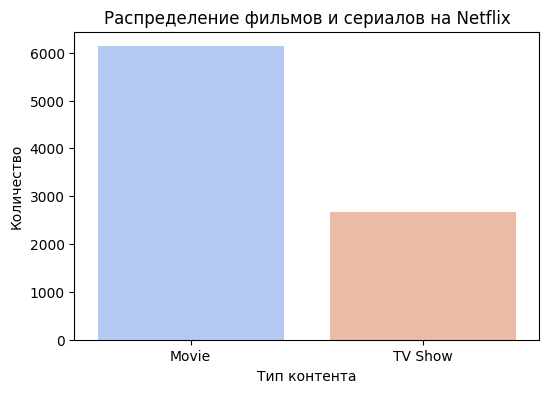

In [3]:
type_counts = df['type'].value_counts().reset_index()
type_counts.columns = ['type', 'count']  # Переименуем столбцы для удобства
# Визуализация данных
plt.figure(figsize=(6, 4))
sns.barplot(x='type', y='count', data=type_counts, palette='coolwarm')
plt.xlabel("Тип контента")
plt.ylabel("Количество")
plt.title("Распределение фильмов и сериалов на Netflix")
plt.show()

## Find the Most Common Rating for Movies and TV Shows

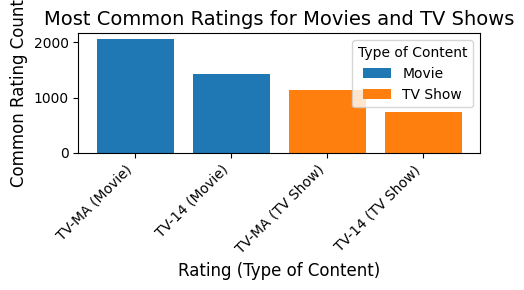

In [4]:
df_filtered = df[['type', 'rating']]
# Группируем по типу контента и рейтингу и считаем количество
grouped_data = df_filtered.groupby(['type', 'rating']).size().reset_index(name='common_rating')

# Для каждого типа контента находим два наиболее популярных рейтинга
top_ratings = grouped_data.sort_values(by=['type', 'common_rating'], ascending=[True, False])
top_ratings = top_ratings.groupby('type').head(2)

# Строим график
plt.figure(figsize=(5, 3))

# Создаем бар-график
for i, content_type in enumerate(top_ratings['type'].unique()):
    content_data = top_ratings[top_ratings['type'] == content_type]
    plt.bar(content_data['rating'] + f" ({content_type})", content_data['common_rating'], label=content_type)

# Добавляем подписи
plt.xlabel('Rating (Type of Content)', fontsize=12)
plt.ylabel('Common Rating Count', fontsize=12)
plt.title('Most Common Ratings for Movies and TV Shows', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.legend(title="Type of Content")
plt.tight_layout()
plt.show()

## Find the Top 5 Countries with the Most Content on Netflix

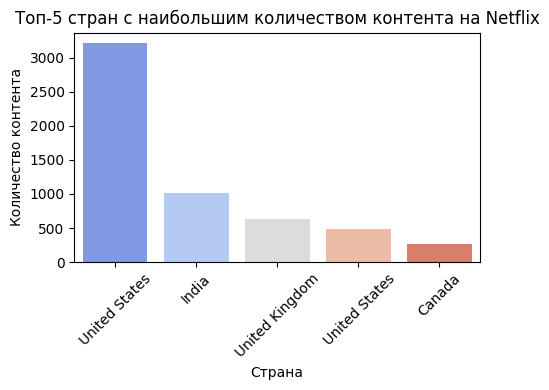

In [5]:
# Разделяем строки с несколькими странами
df_expanded = df['country'].str.split(',', expand=True).stack().reset_index(level=1, drop=True)
df_expanded.name = 'country'

# Подсчитываем количество контента для каждой страны
country_counts = df_expanded.value_counts().reset_index()
country_counts.columns = ['country', 'total_content']

# Сортируем по количеству контента и выбираем топ-5 стран
top_5_countries = country_counts.head(5)

# Визуализация
plt.figure(figsize=(5, 4))
sns.barplot(x='country', y='total_content', data=top_5_countries, palette='coolwarm')
plt.xlabel("Страна")
plt.ylabel("Количество контента")
plt.title("Топ-5 стран с наибольшим количеством контента на Netflix")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Find Content Added in the Last 5 Years by Country

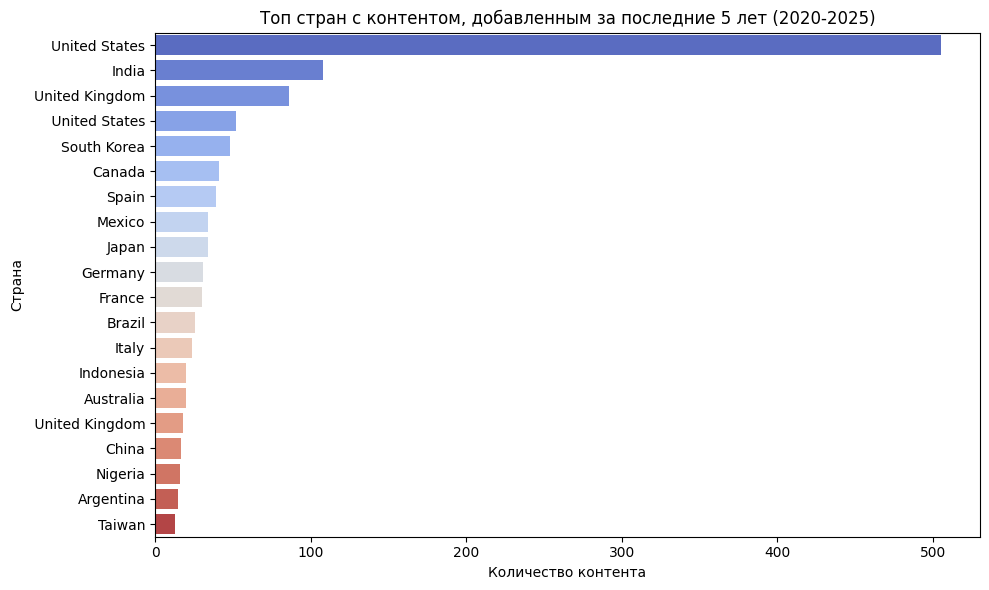

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Загружаем данные
file_path = '/kaggle/input/netflix-shows/netflix_titles.csv'  # Путь к твоему файлу
df = pd.read_csv(file_path)

# Получаем текущий год
current_year = datetime.now().year

# Фильтруем контент, добавленный за последние 5 лет
df_recent = df[df['release_year'] >= current_year - 5]

# Разделяем строки с несколькими странами
df_expanded = df_recent['country'].str.split(',', expand=True).stack().reset_index(level=1, drop=True)
df_expanded.name = 'country'

# Очищаем данные от пропусков
df_expanded = df_expanded[df_expanded.notna()]

# Подсчитываем количество контента для каждой страны
country_counts = df_expanded.value_counts().reset_index()
country_counts.columns = ['country', 'total_content']

# Очищаем от строк с пустыми значениями
country_counts = country_counts[country_counts['country'].notnull()]
country_counts = country_counts[country_counts['total_content'] > 0]  # Убираем строки с нулевым количеством


country_counts = country_counts.head(20)  # Получаем только 20 стран

# Сортируем по количеству контента
country_counts = country_counts.sort_values(by='total_content', ascending=False)

# Визуализация с горизонтальными столбцами
plt.figure(figsize=(10, 6))
sns.barplot(x='total_content', y='country', data=country_counts, palette='coolwarm', orient='h')
plt.xlabel("Количество контента")
plt.ylabel("Страна")
plt.title(f"Топ стран с контентом, добавленным за последние 5 лет ({current_year - 5}-{current_year})")
plt.tight_layout()
plt.show()


## Find the average number of content releases in India on Netflix for each of the last 10 years.

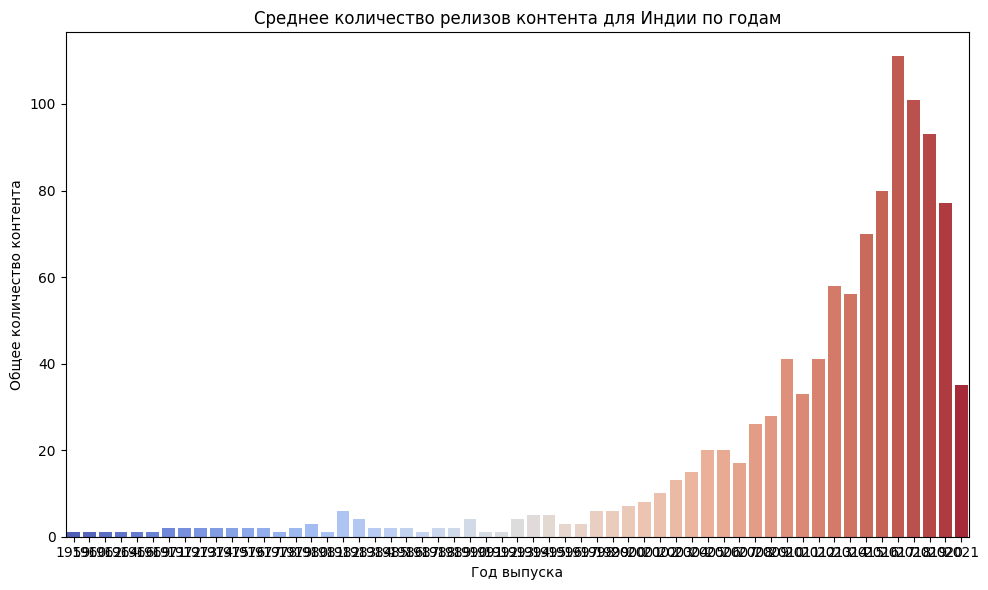

In [7]:
df_india = df[df['country'].str.contains('India', na=False)]

# Группируем по году выпуска и считаем количество контента
content_by_year = df_india.groupby('release_year').size().reset_index(name='total_release')

# Получаем общее количество контента для Индии за все время
total_india_content = df_india.shape[0]

# Добавляем столбец с процентом от общего количества контента
content_by_year['avg_release'] = round((content_by_year['total_release'] / total_india_content) * 100, 2)

# Сортируем по убыванию количества контента
content_by_year = content_by_year.sort_values(by='avg_release', ascending=False)

# Визуализация данных
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='release_year', y='total_release', data=content_by_year, palette='coolwarm')
plt.xlabel("Год выпуска")
plt.ylabel("Общее количество контента")
plt.title("Среднее количество релизов контента для Индии по годам")
plt.tight_layout()
plt.show()